# Topic:
# Credit Card Detection Fraud.

# Loading DataSet.

In [70]:
import pandas as pd

In [71]:
df = pd.read_csv('/content/creditcard.csv')

In [72]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


<Axes: xlabel='Class'>

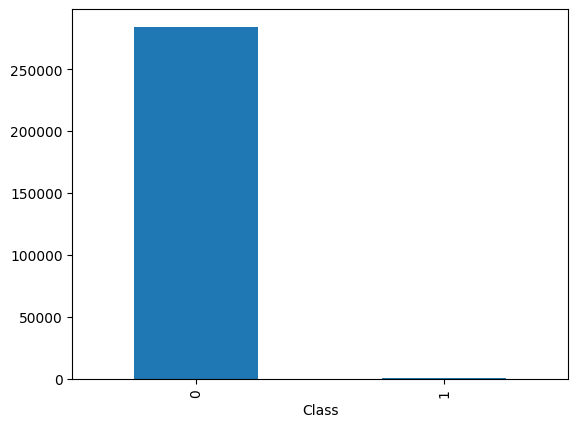

In [73]:
df['Class'].value_counts().plot(kind= 'bar')

In [74]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [75]:
df = df.sample(n= 12000)
df['Class'].value_counts()

,count
Class,
0,11983
1,17


# Applying Train_Test_Split

In [76]:
from sklearn.model_selection import train_test_split
x = df.drop('Class', axis= 1)
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2)

# Train the model without balancing data.

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
pred = rfc.predict(xtest)

# Confusion Matrix
conf = confusion_matrix(ytest, pred)
print('Confusion Matrix:')
print(conf)

# Classification Report
report = classification_report(ytest, pred)
print('Classification Report:')
print(report)

# Accuracy

from sklearn.metrics import accuracy_score
print('Accuracy: ')
print(accuracy_score(ytest, pred))

Confusion Matrix:
[[2397    1]
 [   1    1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2398
           1       0.50      0.50      0.50         2

    accuracy                           1.00      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       1.00      1.00      1.00      2400

Accuracy: 
0.9991666666666666


# Applying RandomOverSampler Tech.

In [78]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_resample, y_resample = ros.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [79]:
y_resample.value_counts()

,count
Class,
0,9585
1,9585


In [80]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_resample, y_resample) # The resample data is put here that's the change only.
pred = rfc.predict(xtest)

# Confusion Matrix
conf = confusion_matrix(ytest, pred)
print('Confusion Matrix:')
print(conf)

# Classification Report
report = classification_report(ytest, pred)
print('Classification Report:')
print(report)

# Accuracy

from sklearn.metrics import accuracy_score
print('Accuracy(RandomOverSampler): ')
print(accuracy_score(ytest, pred))

Confusion Matrix:
[[2397    1]
 [   1    1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2398
           1       0.50      0.50      0.50         2

    accuracy                           1.00      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       1.00      1.00      1.00      2400

Accuracy(RandomOverSampler): 
0.9991666666666666


# Applying RandomUnderSampler Tech.

In [81]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_rusample, y_rusample = rus.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [82]:
y_rusample.value_counts()

,count
Class,
0,15
1,15


In [83]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_rusample, y_rusample)
pred = rfc.predict(xtest)

# Confusion Matrix
conf = confusion_matrix(ytest, pred)
print('Confusion Matrix:')
print(conf)

# Classification Report
report = classification_report(ytest, pred)
print('Classification Report:')
print(report)

# Accuracy

from sklearn.metrics import accuracy_score
print('Accuracy(RandomUnderSampler): ')
print(accuracy_score(ytest, pred))

Confusion Matrix:
[[2187  211]
 [   0    2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2398
           1       0.01      1.00      0.02         2

    accuracy                           0.91      2400
   macro avg       0.50      0.96      0.49      2400
weighted avg       1.00      0.91      0.95      2400

Accuracy(RandomUnderSampler): 
0.9120833333333334


# Synthetic minority oversampling technique (SMOTE)

In [84]:
from imblearn.over_sampling import SMOTE
smt= SMOTE()
x_smote, y_smote = smt.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [85]:
y_smote.value_counts()

,count
Class,
0,9585
1,9585


In [86]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rfc_smote_model = RandomForestClassifier()
rfc_smote_model.fit(x_smote, y_smote) # SMOTE train_data
pred = rfc.predict(xtest)

# Confusion Matrix
conf = confusion_matrix(ytest, pred)
print('Confusion Matrix:')
print(conf)

# Classification Report
report = classification_report(ytest, pred)
print('Classification Report:')
print(report)

# Accuracy

from sklearn.metrics import accuracy_score
print('Accuracy(SMOTE): ')
print(accuracy_score(ytest, pred))

Confusion Matrix:
[[2187  211]
 [   0    2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2398
           1       0.01      1.00      0.02         2

    accuracy                           0.91      2400
   macro avg       0.50      0.96      0.49      2400
weighted avg       1.00      0.91      0.95      2400

Accuracy(SMOTE): 
0.9120833333333334


# Prediction

In [87]:
# Making a 2D data.
input1 = xtest.iloc[[10]].values

# Predicting

prediction = rfc_smote_model.predict(input1)
print('Original Class: ', ytest.iloc[10])
print('Predicted Class: ', prediction[0])

Original Class:  0
Predicted Class:  0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
